In [1]:
#!pip install mlxtend

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# numpy
import numpy as np # linear algebra
print('numpy: {}'.format(np.__version__))
# pandas
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print('pandas: {}'.format(pd.__version__))
import math
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import matplotlib.pyplot as plt
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

numpy: 1.26.4
pandas: 2.2.1
Python: 3.12.5 (main, Aug 23 2024, 00:00:00) [GCC 14.2.1 20240801 (Red Hat 14.2.1-1)]
scipy: 1.11.3
matplotlib: 3.8.4
sklearn: 1.5.1
seaborn: 0.13.2


*In order to avoid problems with missing values I dropped the cases containning N/A values*

In [3]:
fpath='./'#'/kaggle/input/icr-identify-age-related-conditions/'
train= pd.read_csv(fpath + 'train.csv', low_memory=False)
df2= pd.DataFrame(train)
df1=df2.dropna(how='any',axis =0)
df=df1.dropna(how='any',axis =1)
#display(df)

theClass = df['Class']
df = df.drop('EJ', axis = 1)
df = df.drop('Id', axis = 1)
assays = df.drop('Class', axis = 1)
display (assays)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.175193,2607.26686,85.200147,7.067354,8.138688,4.030845,0.025578,3.396778,1.229900,6757.45461,...,9.256327,0.173229,1.89486,1.395238,16.911036,246.093155,10960.364830,38.380254,41.007968,21.978000
612,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,9.879296,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000
613,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.910227,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340
614,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,12.029366,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000


In [4]:
#the_pairs =
#sns.pairplot(assays)
#plt.show()

In [5]:

display(assays)

display (theClass)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.175193,2607.26686,85.200147,7.067354,8.138688,4.030845,0.025578,3.396778,1.229900,6757.45461,...,9.256327,0.173229,1.89486,1.395238,16.911036,246.093155,10960.364830,38.380254,41.007968,21.978000
612,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,9.879296,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000
613,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.910227,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340
614,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,12.029366,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000


0      1
1      0
2      0
3      0
4      1
      ..
611    0
612    0
613    0
614    0
616    0
Name: Class, Length: 548, dtype: int64

## *Stepwise regression, forward*

/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


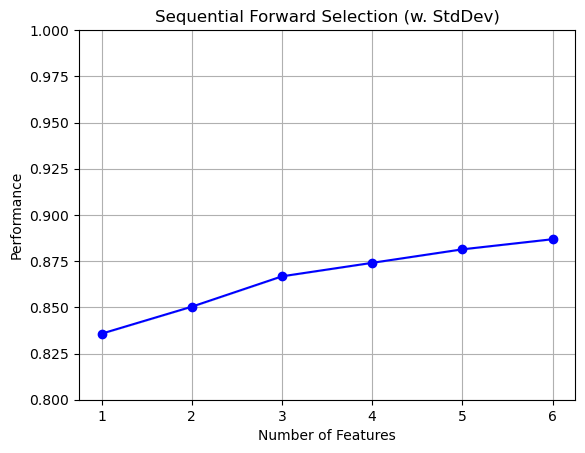

0.8868613138686131

In [6]:
from sklearn import linear_model as lm
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

df_ej = pd.get_dummies(df1['EJ'])

# Perform stepwise regression

sfs = SequentialFeatureSelector(lm.LogisticRegression(max_iter = 10000),
                                k_features=6,
                                forward=True,
                                scoring='accuracy',
                                cv=None)
selected_features = sfs.fit(assays, theClass)#

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

sfs.subsets_
sfs.k_score_


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector

/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


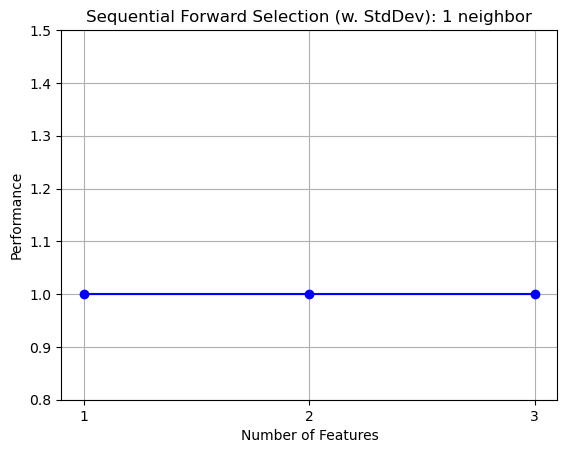

{1: {'feature_idx': (9,),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('BD ',)},
 2: {'feature_idx': (0, 9),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('AB', 'BD ')},
 3: {'feature_idx': (0, 1, 9),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('AB', 'AF', 'BD ')}}

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
sfs4 = SequentialFeatureSelector(knn,
                                k_features=3,
                                forward=True,
                                 floating = False,
                                scoring='accuracy',
                                cv=None)
selected_features = sfs4.fit(assays, theClass)#

fig1 = plot_sfs(sfs4.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1.5])
plt.title('Sequential Forward Selection (w. StdDev): 1 neighbor')
plt.grid()
plt.show()

sfs4.subsets_

/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


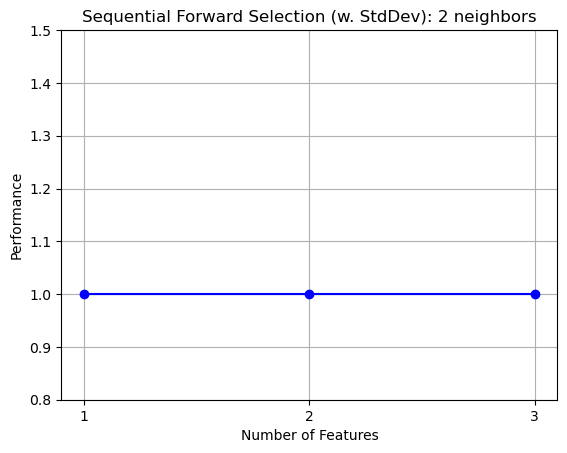

{1: {'feature_idx': (9,),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('BD ',)},
 2: {'feature_idx': (0, 9),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('AB', 'BD ')},
 3: {'feature_idx': (0, 1, 9),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('AB', 'AF', 'BD ')}}

In [9]:
knn2 = KNeighborsClassifier(n_neighbors=2)
sfs2 = SequentialFeatureSelector(knn2,
                                k_features=3,
                                forward=True,
                                 floating = False,
                                scoring='accuracy',
                                cv=None)
selected_features = sfs4.fit(assays, theClass)#

fig1 = plot_sfs(sfs4.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1.5])
plt.title('Sequential Forward Selection (w. StdDev): 2 neighbors')
plt.grid()
plt.show()

sfs4.subsets_

/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


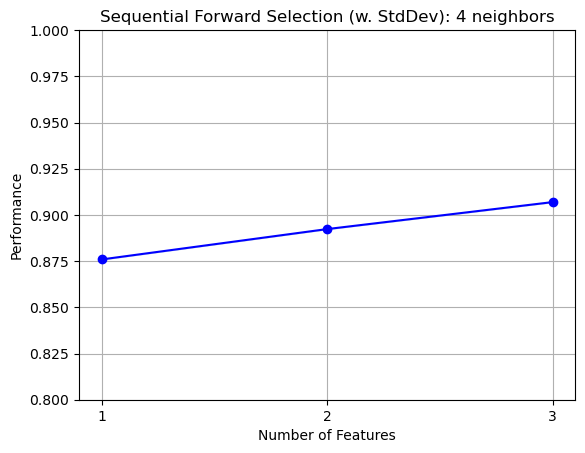

{1: {'feature_idx': (32,),
  'cv_scores': array([0.87591241]),
  'avg_score': 0.8759124087591241,
  'feature_names': ('DU',)},
 2: {'feature_idx': (21, 32),
  'cv_scores': array([0.89233577]),
  'avg_score': 0.8923357664233577,
  'feature_names': ('CR', 'DU')},
 3: {'feature_idx': (21, 32, 38),
  'cv_scores': array([0.90693431]),
  'avg_score': 0.906934306569343,
  'feature_names': ('CR', 'DU', 'EH')}}

In [10]:
knn4 = KNeighborsClassifier(n_neighbors=4)
sfs4 = SequentialFeatureSelector(knn4,
                                k_features=3,
                                forward=True,
                                 floating = False,
                                scoring='accuracy',
                                cv=None)
selected_features = sfs4.fit(assays, theClass)#

fig1 = plot_sfs(sfs4.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev): 4 neighbors')
plt.grid()
plt.show()

sfs4.subsets_

/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


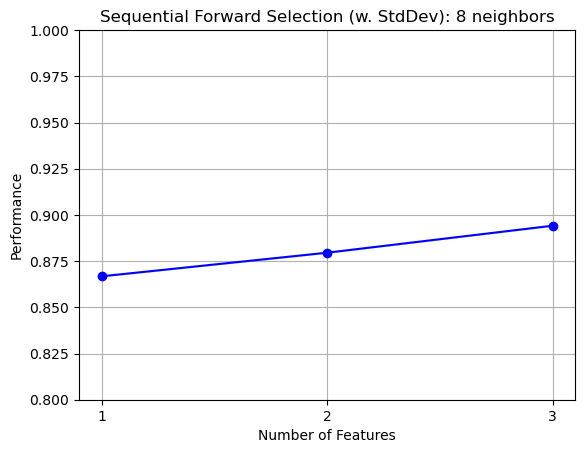

{1: {'feature_idx': (32,),
  'cv_scores': array([0.86678832]),
  'avg_score': 0.8667883211678832,
  'feature_names': ('DU',)},
 2: {'feature_idx': (8, 32),
  'cv_scores': array([0.87956204]),
  'avg_score': 0.8795620437956204,
  'feature_names': ('BC', 'DU')},
 3: {'feature_idx': (8, 32, 40),
  'cv_scores': array([0.89416058]),
  'avg_score': 0.8941605839416058,
  'feature_names': ('BC', 'DU', 'EP')}}

In [11]:
knn8 = KNeighborsClassifier(n_neighbors=8)
sfs8 = SequentialFeatureSelector(knn8,
                                k_features=3,
                                forward=True,
                                 floating = False,
                                scoring='accuracy',
                                cv=None)
selected_features = sfs8.fit(assays, theClass)#

fig1 = plot_sfs(sfs8.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev): 8 neighbors')
plt.grid()
plt.show()

sfs8.subsets_

/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib64/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


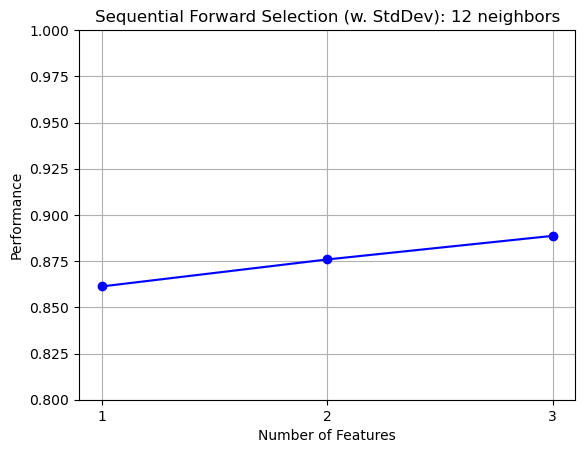

{1: {'feature_idx': (32,),
  'cv_scores': array([0.86131387]),
  'avg_score': 0.8613138686131386,
  'feature_names': ('DU',)},
 2: {'feature_idx': (21, 32),
  'cv_scores': array([0.87591241]),
  'avg_score': 0.8759124087591241,
  'feature_names': ('CR', 'DU')},
 3: {'feature_idx': (0, 21, 32),
  'cv_scores': array([0.88868613]),
  'avg_score': 0.8886861313868614,
  'feature_names': ('AB', 'CR', 'DU')}}

In [12]:
knn12 = KNeighborsClassifier(n_neighbors=12)
sfs12 = SequentialFeatureSelector(knn12,
                                k_features=3,
                                forward=True,
                                 floating = False,
                                scoring='accuracy',
                                cv=None)
selected_features = sfs12.fit(assays, theClass)#

fig1 = plot_sfs(sfs12.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev): 12 neighbors')
plt.grid()
plt.show()

sfs12.subsets_


## *Neural Networks*

In [13]:
'''

import torch

# determine the supported device
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

# convert a df to tensor to be used in pytorch
def df_to_tensor(df):
    device = get_device()
    return torch.from_numpy(df.values).float().to(device)

X = df_to_tensor(assays)  #assays_tensor
y = df_to_tensor(theClass)  #theClass_tensor

'''

"\n\nimport torch\n\n# determine the supported device\ndef get_device():\n    if torch.cuda.is_available():\n        device = torch.device('cuda:0')\n    else:\n        device = torch.device('cpu') # don't have GPU \n    return device\n\n# convert a df to tensor to be used in pytorch\ndef df_to_tensor(df):\n    device = get_device()\n    return torch.from_numpy(df.values).float().to(device)\n\nX = df_to_tensor(assays)  #assays_tensor\ny = df_to_tensor(theClass)  #theClass_tensor\n\n"

### Next, we can use the prepared probabilistic model to make a prediction

## *PCR and PLSR*

The calculations will be made at : cpu


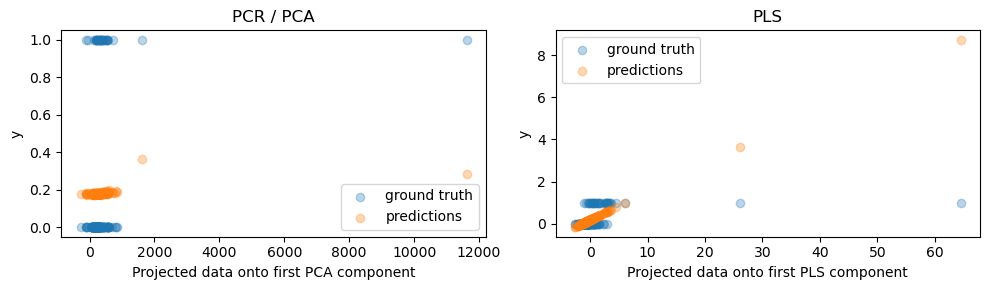

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split

import torch

# determine the supported device
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
        print ( "The calculations will be made at : cuda:0" )
    else:
        device = torch.device('cpu') # don't have GPU 
        print ( "The calculations will be made at : cpu" )
    return device

device = get_device()

# convert a df to tensor to be used in pytorch
def df_to_tensor(df):
    mydevice = device
    return torch.from_numpy(df.values).float().to(mydevice)

X = df_to_tensor(assays)  #assays_tensor
y = df_to_tensor(theClass)  #theClass_tensor

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

## *Decission Trees*

In [15]:
# I will get the '1' and '0' classifieds apparts

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

'''
theClass = df['Class']

assays = df.drop('Id', axis = 1)
assays = assays.drop('Class', axis = 1)
display (assays)
'''
#df = df.drop('EJ', axis = 1)
print (df)
positives = df.loc[df['Class'] == 1]
negatives =  df.loc[df['Class'] == 0]

posClass = positives['Class']
posClass = posClass.astype('bool')
negClass = negatives['Class']
negClass = negClass.astype('bool')

positives = positives.drop('Class', axis = 1)
print ('Printing matrix Class = True---------------------------------------\n', positives)

negatives = negatives.drop('Class', axis = 1)
print ('Printing matrix Class = FalseFalse---------------------------------------\n', negatives)

# Split dataset into training set and test set
Xp_train, Xp_test, yp_train, yp_test = train_test_split(positives, posClass, test_size=0.3, random_state=1) # 70% training and 30% test
Xn_train, Xn_test, yn_train, yn_test = train_test_split(negatives, negClass, test_size=0.3, random_state=1) # 70% training and 30% test

X_train = pd.concat([Xp_train, Xn_train], ignore_index=True)
y_train = pd.concat([yp_train, yn_train], ignore_index=True)

X_test = pd.concat([Xp_test, Xn_test], ignore_index=True)
y_test = pd.concat([yp_test, yn_test], ignore_index=True)

print('Printing test matrix (Random choices of Trues qnd Falses)---------------------------------------\n',X_test)


           AB          AF          AH          AM         AR        AX  \
0    0.209377  3109.03329   85.200147   22.394407   8.138688  0.699861   
1    0.145282   978.76416   85.200147   36.968889   8.138688  3.632190   
2    0.470030  2635.10654   85.200147   32.360553   8.138688  6.732840   
3    0.252107  3819.65177  120.201618   77.112203   8.138688  3.685344   
4    0.380297  3733.04844   85.200147   14.103738   8.138688  3.942255   
..        ...         ...         ...         ...        ...       ...   
611  0.175193  2607.26686   85.200147    7.067354   8.138688  4.030845   
612  0.149555  3130.05946  123.763599    9.513984  13.020852  3.499305   
613  0.435846  5462.03438   85.200147   46.551007  15.973224  5.979825   
614  0.427300  2459.10720  130.138587   55.355778  10.005552  8.070549   
616  0.482849  2672.53426  546.663930  112.006102   8.138688  3.198099   

           AY         AZ          BC         BD   ...         FL        FR  \
0    0.025578   9.812214    5.555

In [16]:
# I will get the '1' and '0' classifieds apparts

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

'''
theClass = df['Class']

assays = df.drop('Id', axis = 1)
assays = assays.drop('Class', axis = 1)
display (assays)
'''
#df = df.drop('EJ', axis = 1)
print (df)
positives = df.loc[df['Class'] == 1]
negatives =  df.loc[df['Class'] == 0]

posClass = positives['Class']
posClass = posClass.astype('bool')
negClass = negatives['Class']
negClass = negClass.astype('bool')

positives = positives.drop('Class', axis = 1)
print ('Printing matrix Class = True---------------------------------------\n', positives)

negatives = negatives.drop('Class', axis = 1)
print ('Printing matrix Class = FalseFalse---------------------------------------\n', negatives)

# Split dataset into training set and test set
Xp_train, Xp_test, yp_train, yp_test = train_test_split(positives, posClass, test_size=0.3, random_state=1) # 70% training and 30% test
Xn_train, Xn_test, yn_train, yn_test = train_test_split(negatives, negClass, test_size=0.3, random_state=1) # 70% training and 30% test

X_train = pd.concat([Xp_train, Xn_train], ignore_index=True)
y_train = pd.concat([yp_train, yn_train], ignore_index=True)

X_test = pd.concat([Xp_test, Xn_test], ignore_index=True)
y_test = pd.concat([yp_test, yn_test], ignore_index=True)

print('Printing test matrix (Random choices of Trues qnd Falses)---------------------------------------\n',X_test)


           AB          AF          AH          AM         AR        AX  \
0    0.209377  3109.03329   85.200147   22.394407   8.138688  0.699861   
1    0.145282   978.76416   85.200147   36.968889   8.138688  3.632190   
2    0.470030  2635.10654   85.200147   32.360553   8.138688  6.732840   
3    0.252107  3819.65177  120.201618   77.112203   8.138688  3.685344   
4    0.380297  3733.04844   85.200147   14.103738   8.138688  3.942255   
..        ...         ...         ...         ...        ...       ...   
611  0.175193  2607.26686   85.200147    7.067354   8.138688  4.030845   
612  0.149555  3130.05946  123.763599    9.513984  13.020852  3.499305   
613  0.435846  5462.03438   85.200147   46.551007  15.973224  5.979825   
614  0.427300  2459.10720  130.138587   55.355778  10.005552  8.070549   
616  0.482849  2672.53426  546.663930  112.006102   8.138688  3.198099   

           AY         AZ          BC         BD   ...         FL        FR  \
0    0.025578   9.812214    5.555

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy')
#print (X_train.dtypes)
#print ("------------------------------------> printing Ej <-------------------------------\n", X_train["EJ"])
#print (y_train.dtype)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
 
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

valida = clf.predict(assays)
#display (valida)



Accuracy: 0.8242424242424242


 Displayed by tree.plot 
 -----------------------------------------------------------
 Displayed by pydotplus 
 -----------------------------------------------------------


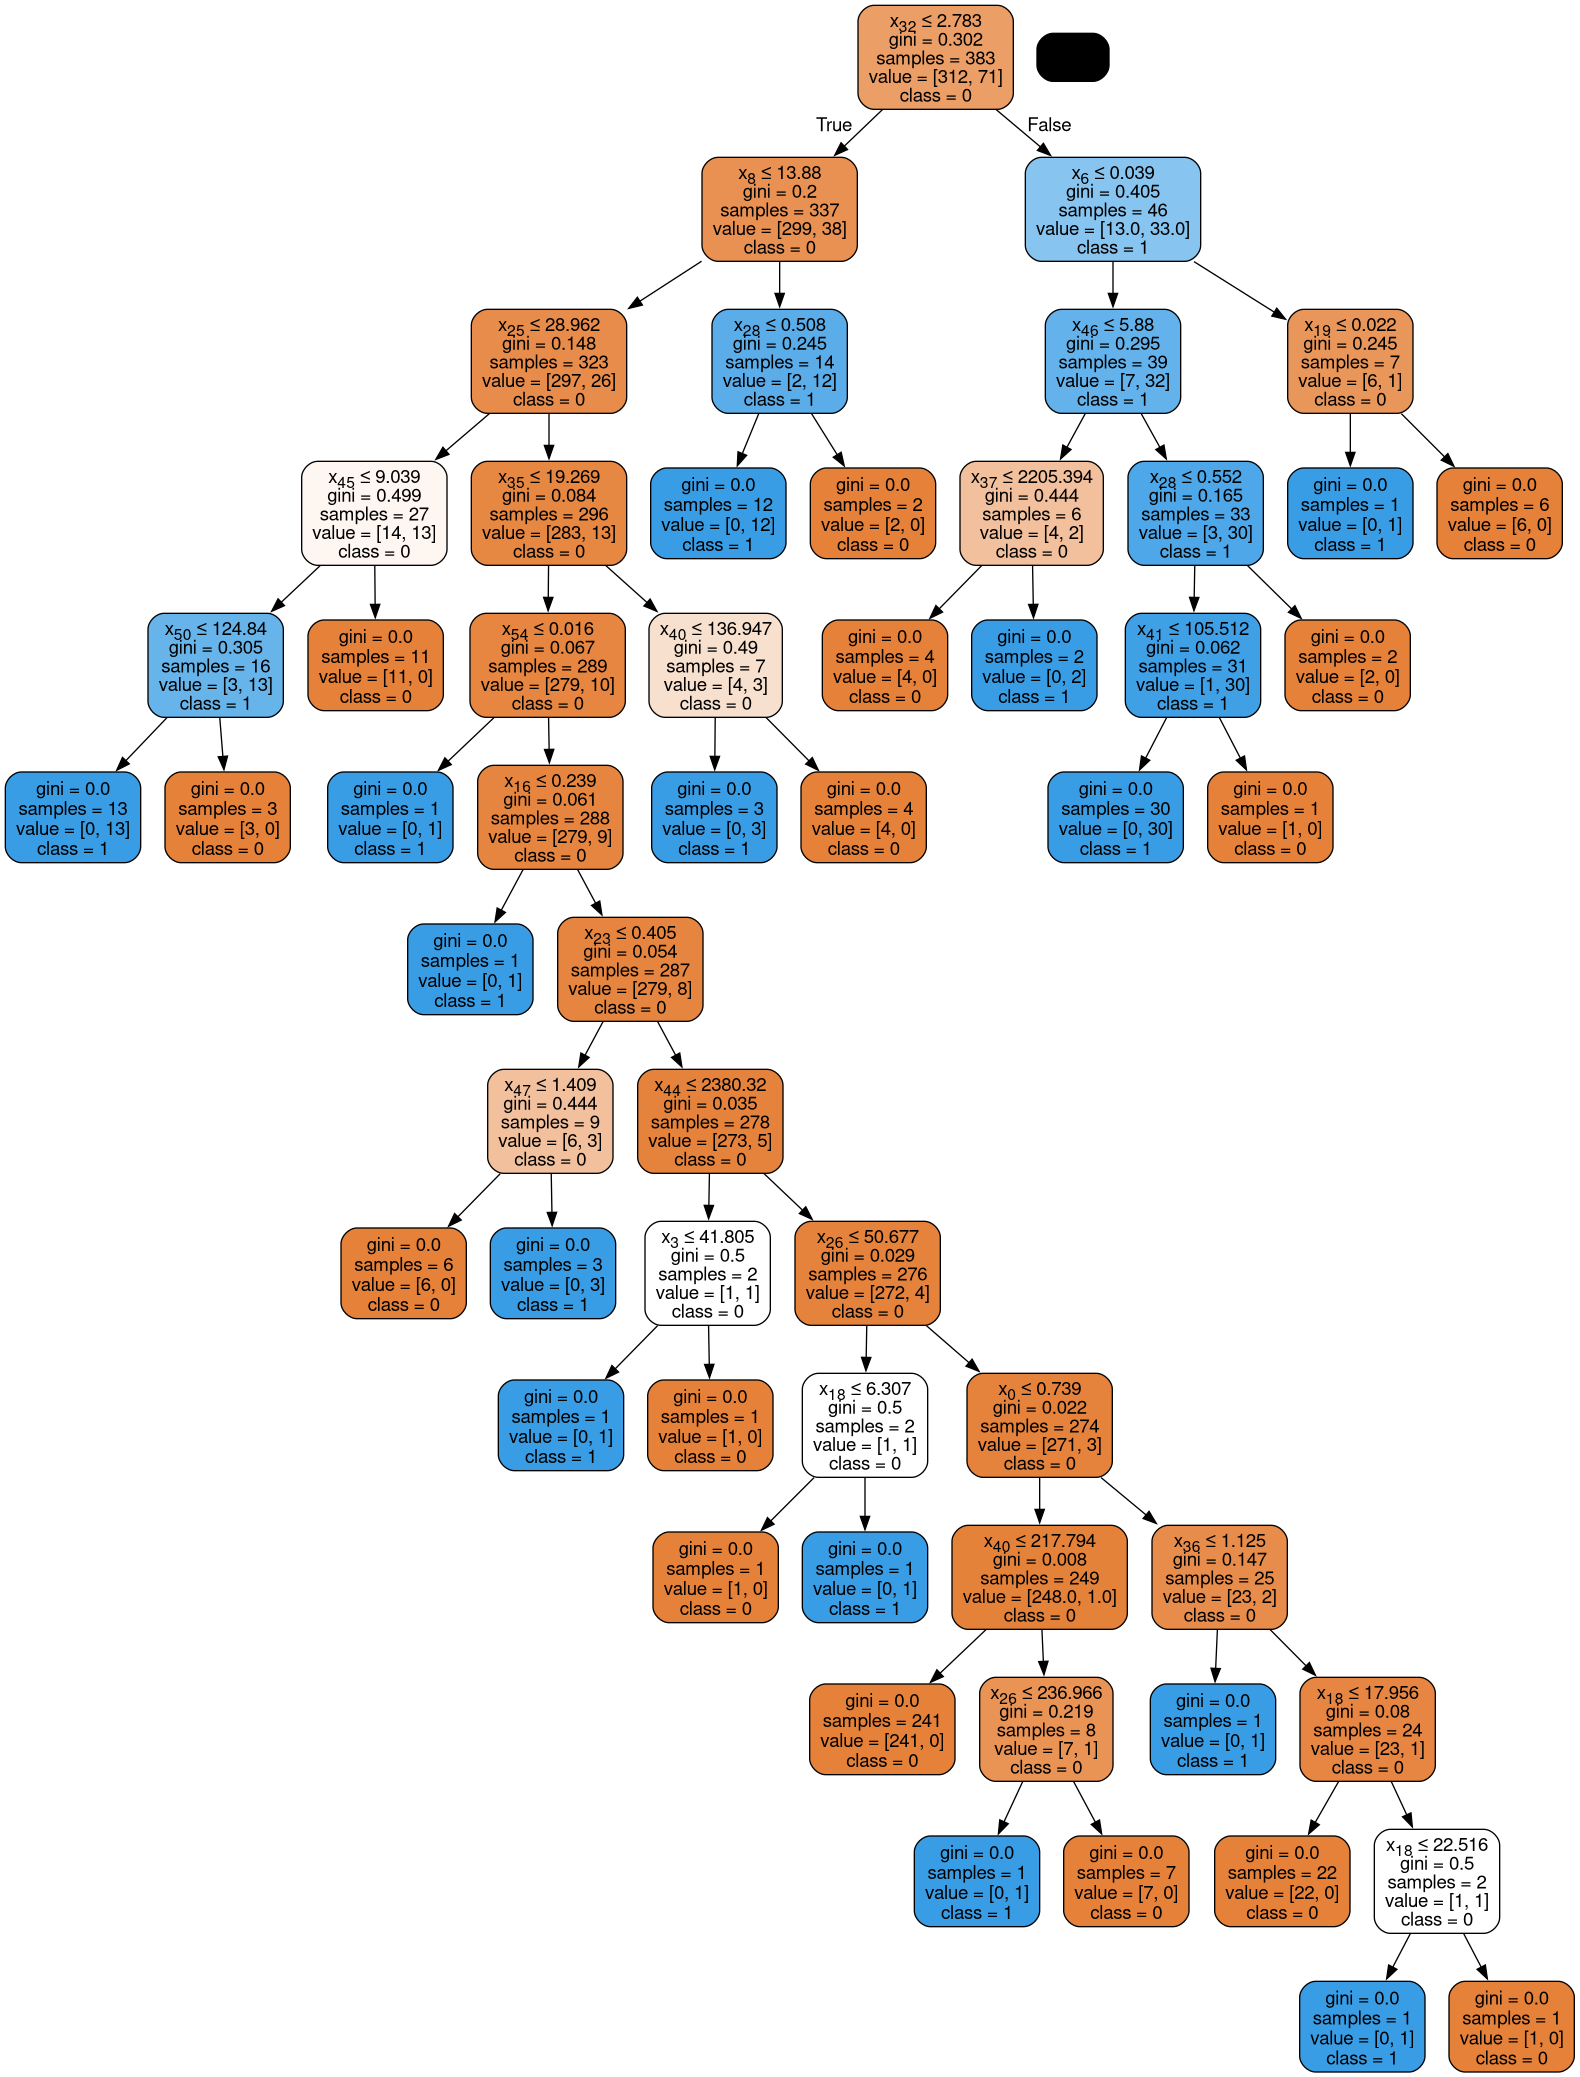

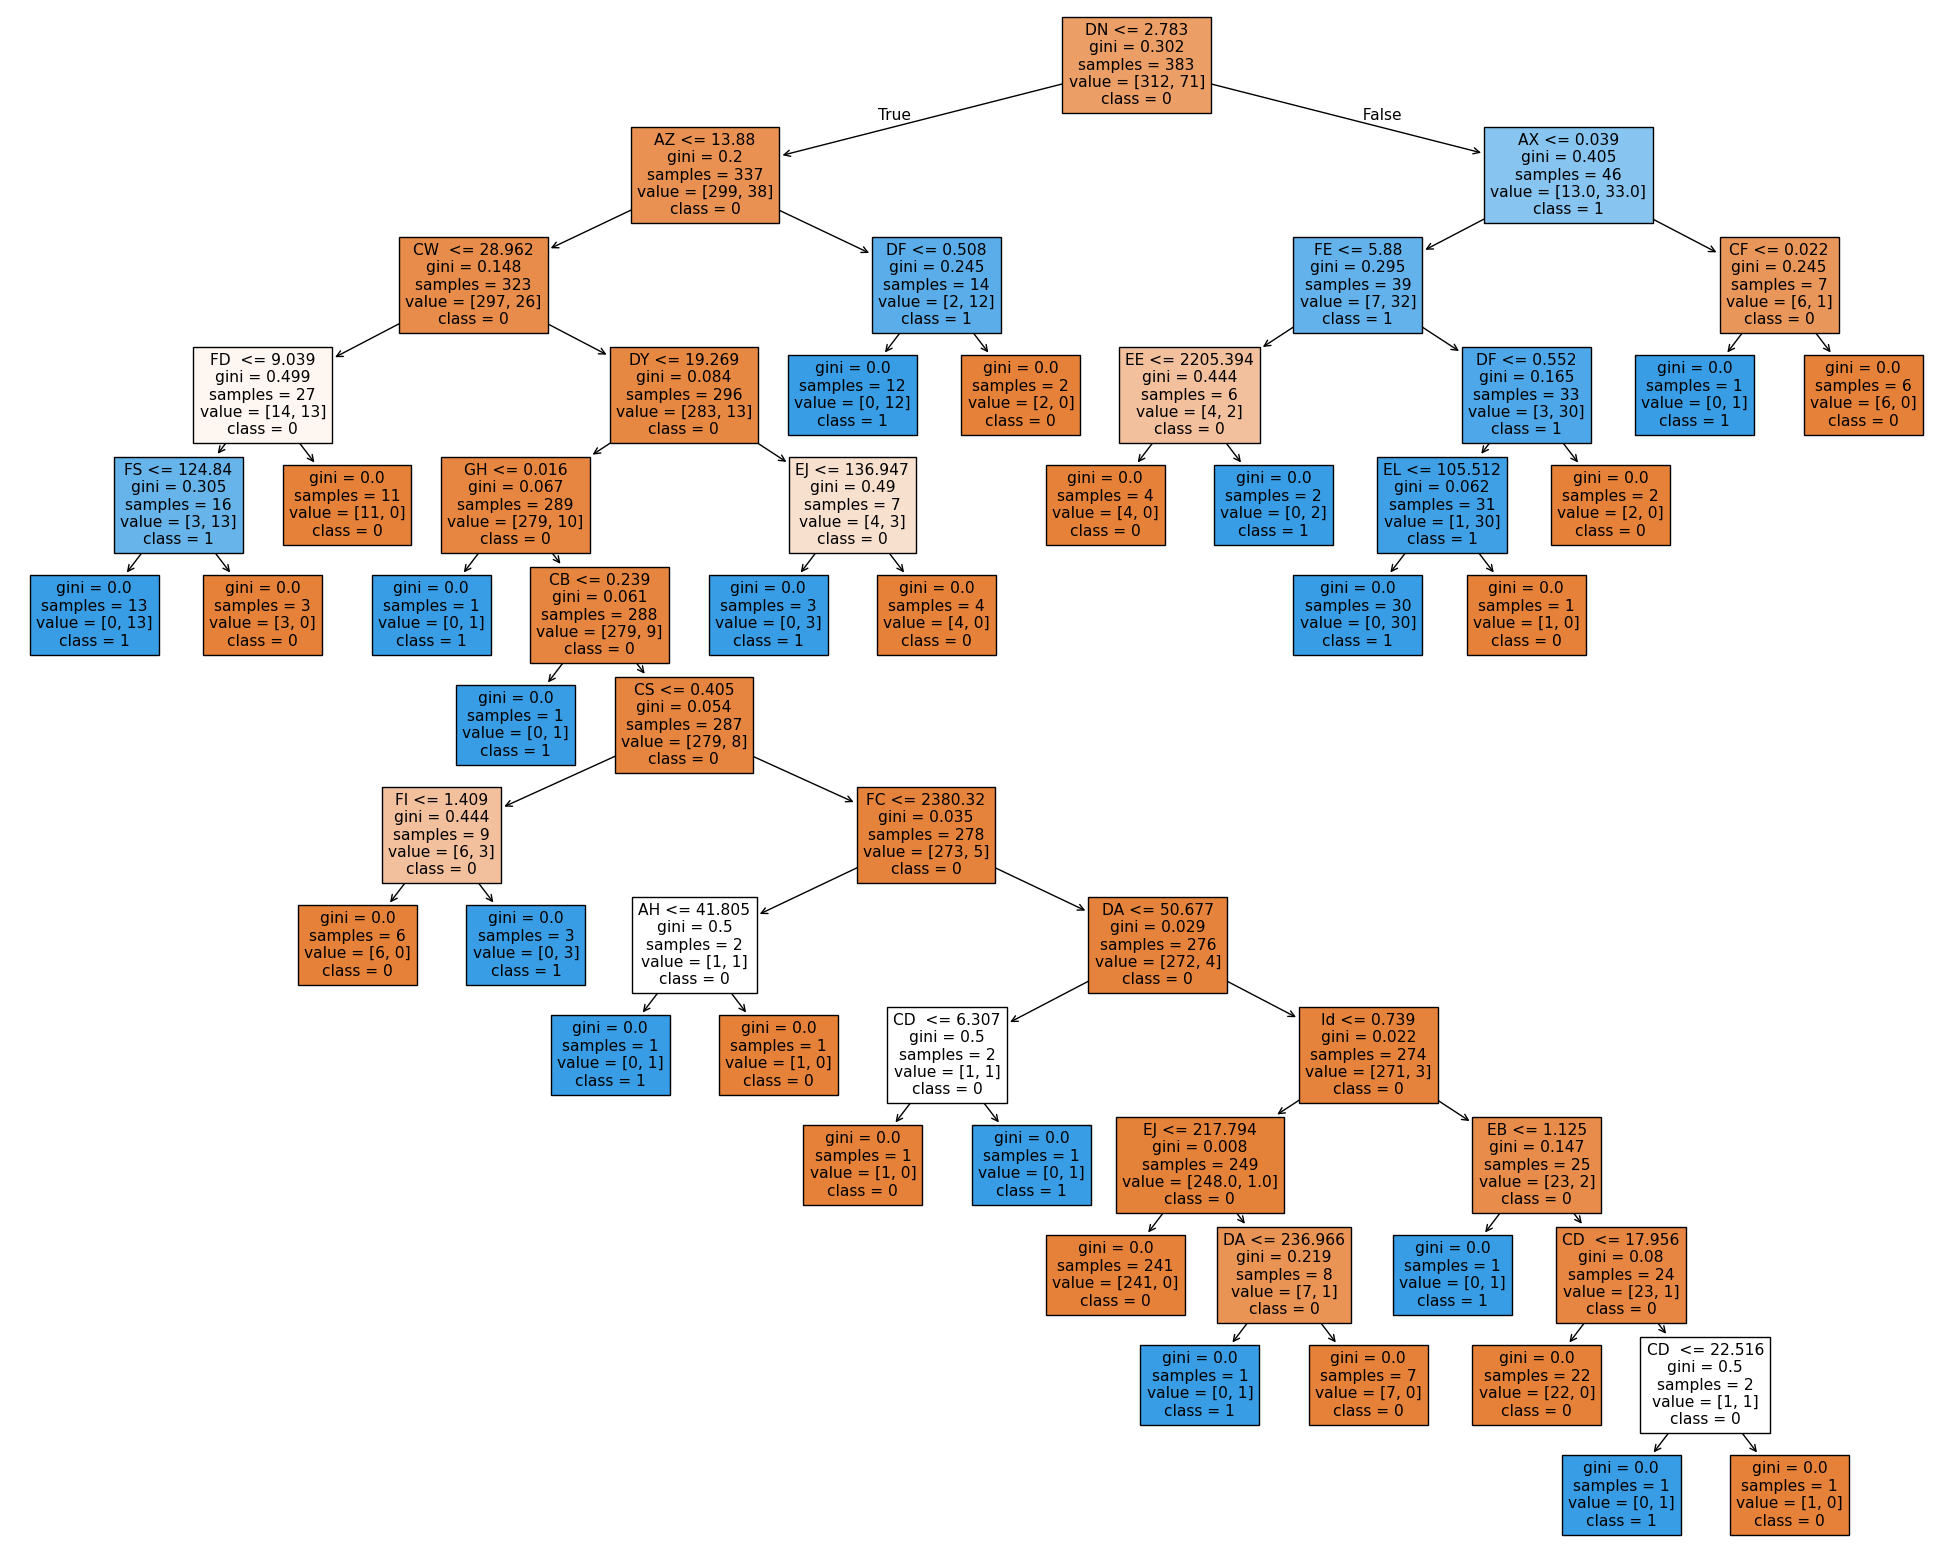

In [18]:
'''!pip install graphviz
!pip install pydotplus
!pip install six '''

import graphviz
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree

from sklearn import tree

print  (" Displayed by tree.plot \n -----------------------------------------------------------")
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=df1.columns,  
                   class_names=['0','1'],
                   filled=True)


# les write clf tree in memmory, pretending doing that to a file
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , class_names=['0','1'])
print  (" Displayed by pydotplus \n -----------------------------------------------------------")
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ICR.png')
Image(graph.create_png())


In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=  6)
#print (X_train.dtypes)
#print ("------------------------------------> printing Ej <-------------------------------\n", X_train["EJ"])
#print (y_train.dtype)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

valida = clf.predict(assays)
#display (valida)



Accuracy: 0.8424242424242424


 Displayed by tree.plot 
 -----------------------------------------------------------
 Displayed by pydotplus 
 -----------------------------------------------------------


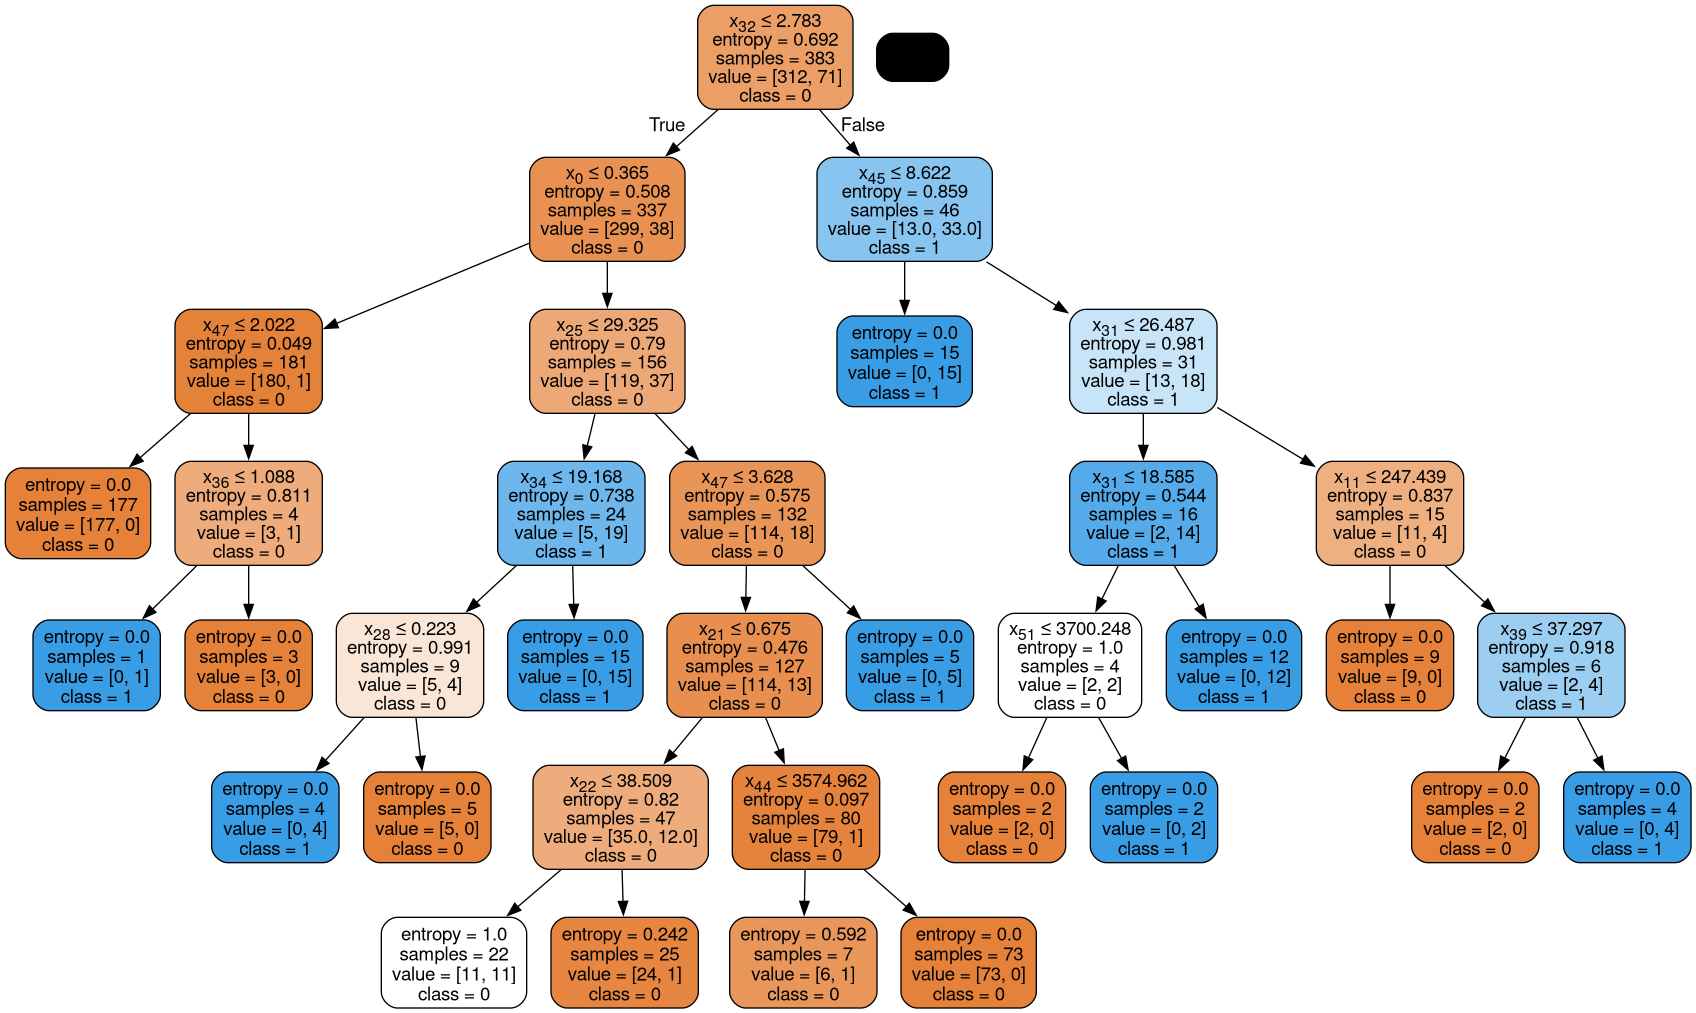

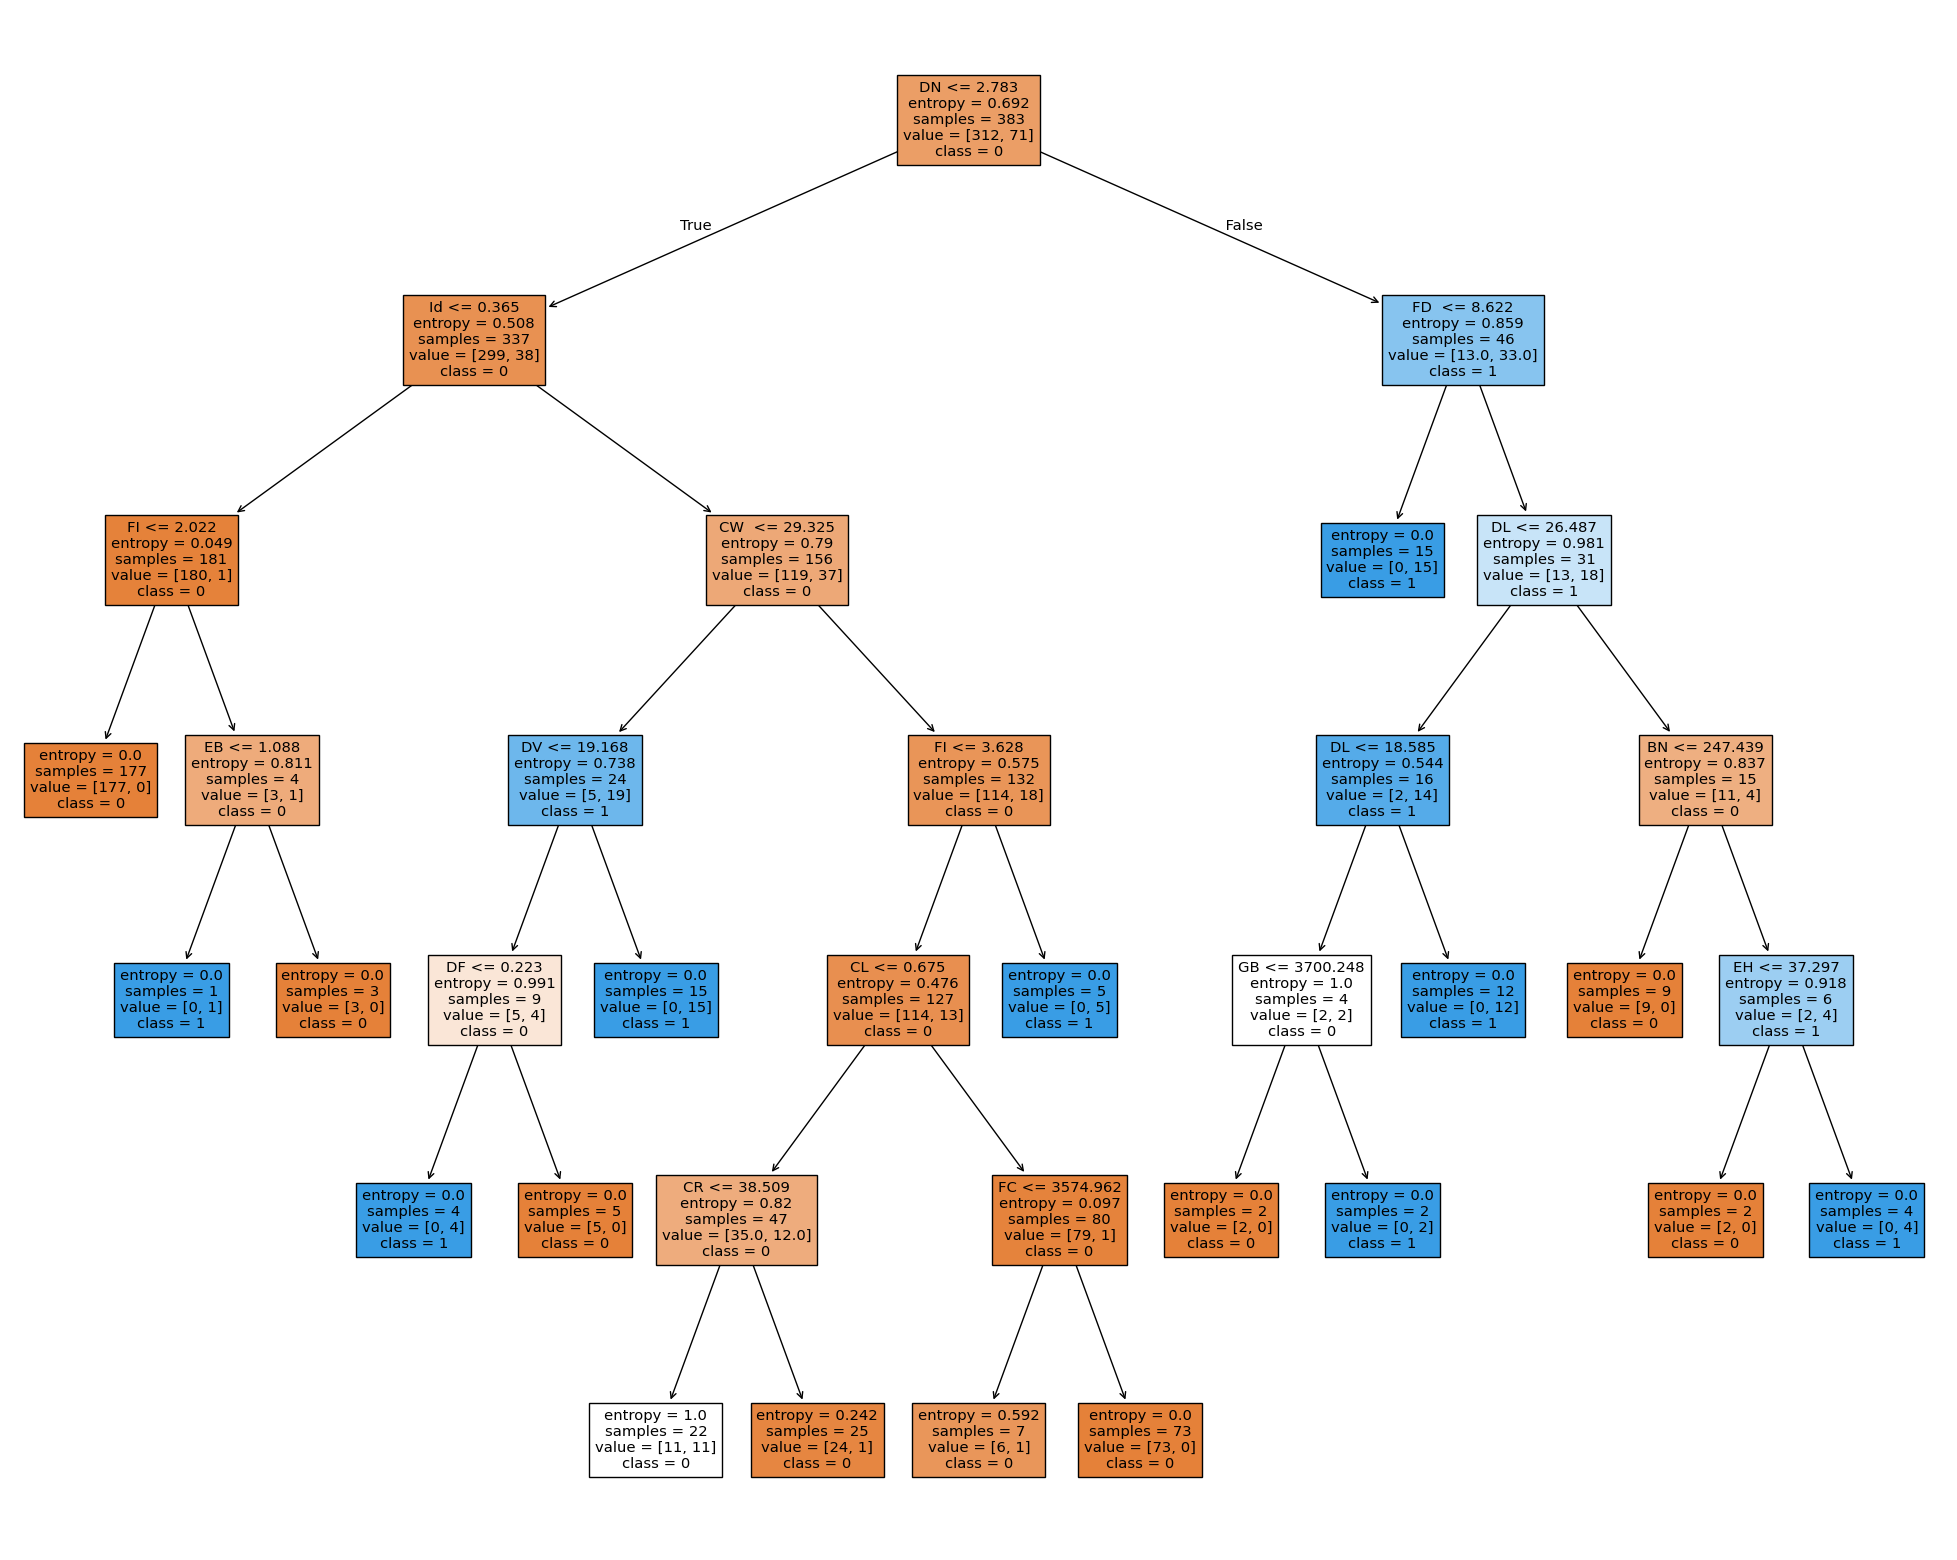

In [20]:

print  (" Displayed by tree.plot \n -----------------------------------------------------------")
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=df1.columns,  
                   class_names=['0','1'],
                   filled=True)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , class_names=['0','1'])

print  (" Displayed by pydotplus \n -----------------------------------------------------------")
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ICR.png')
Image(graph.create_png())